In [7]:
## importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn as sk

In [8]:
## Reading the dataset

In [9]:
data = pd.read_csv("Food_demand.csv")

In [ ]:
## Exploratory Data Analysis

In [10]:
data.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [3]:
data.tail()

,center_id,city_code,region_code,center_type,op_area
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1
76,51,638,56,TYPE_A,7.0


In [4]:
data.shape

(77, 5)

In [ ]:
## Data Visualisation

In [5]:
import warnings
warnings.filterwarnings("ignore")

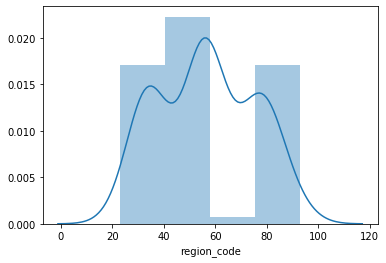

In [6]:
sb.distplot(data["region_code"])

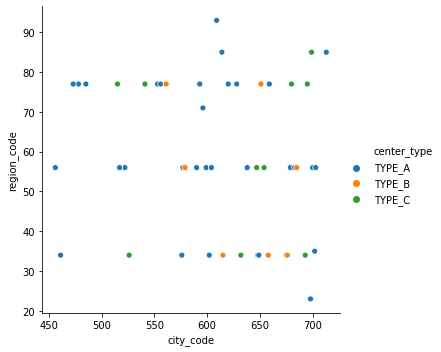

In [8]:
sb.relplot(x="city_code",y="region_code",data=data,hue="center_type")

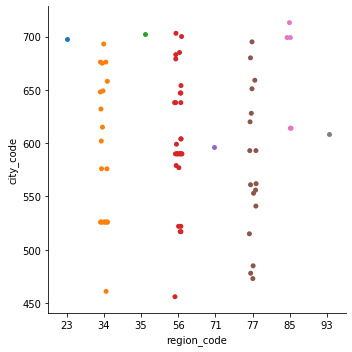

In [9]:
sb.catplot(x="region_code",y="city_code",data=data)

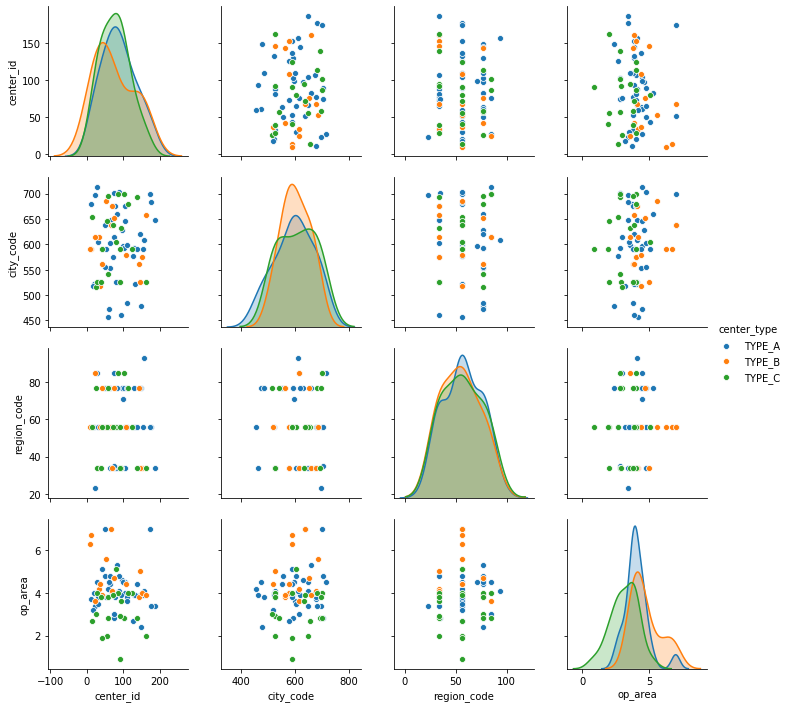

In [10]:
sb.pairplot(data,hue="center_type")

In [ ]:
## Descriptive Statistics

In [11]:
data = pd.read_csv("Food_demand.csv")

In [12]:
data.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
center_id      77 non-null int64
city_code      77 non-null int64
region_code    77 non-null int64
center_type    77 non-null object
op_area        77 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.8+ KB


In [14]:
data.describe()

,center_id,city_code,region_code,op_area
count,77.000000,77.000000,77.000000,77.000000
mean,83.142857,600.662338,56.493506,3.985714
std,46.090219,66.720274,18.126473,1.106406
min,10.000000,456.000000,23.000000,0.900000
25%,50.000000,553.000000,34.000000,3.500000
50%,77.000000,596.000000,56.000000,3.900000
75%,110.000000,651.000000,77.000000,4.400000
max,186.000000,713.000000,93.000000,7.000000


In [15]:
data.mean()

center_id       83.142857
city_code      600.662338
region_code     56.493506
op_area          3.985714
dtype: float64

In [16]:
data["region_code"].mean()

56.493506493506494

In [17]:
data.median()

center_id       77.0
city_code      596.0
region_code     56.0
op_area          3.9
dtype: float64

In [18]:
data["op_area"].median()

3.9

In [19]:
data.mode()

,center_id,city_code,region_code,center_type,op_area
0,10,590.0,56.0,TYPE_A,4.0
1,11,NaN,NaN,NaN,NaN
2,13,NaN,NaN,NaN,NaN
3,14,NaN,NaN,NaN,NaN
4,17,NaN,NaN,NaN,NaN
...,...,...,...,...,...
72,161,NaN,NaN,NaN,NaN
73,162,NaN,NaN,NaN,NaN
74,174,NaN,NaN,NaN,NaN
75,177,NaN,NaN,NaN,NaN


In [20]:
data.skew()

center_id      0.348328
city_code     -0.193313
region_code    0.062657
op_area        0.524460
dtype: float64

In [21]:
data.kurtosis()

center_id     -0.770313
city_code     -0.802889
region_code   -1.146900
op_area        1.754008
dtype: float64

In [22]:
data.max()

center_id         186
city_code         713
region_code        93
center_type    TYPE_C
op_area             7
dtype: object

In [23]:
data.min()

center_id          10
city_code         456
region_code        23
center_type    TYPE_A
op_area           0.9
dtype: object

In [25]:
data.columns

Index(['center_id', 'city_code', 'region_code', 'center_type', 'op_area'], dtype='object')

In [26]:
data.count()

center_id      77
city_code      77
region_code    77
center_type    77
op_area        77
dtype: int64

In [27]:
data["center_type"].replace({"TYPE_A":0,"TYPE_B":1,"TYPE_C":2},inplace = True)

In [28]:
data.head(10)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,0,3.7
1,13,590,56,1,6.7
2,124,590,56,2,4.0
3,66,648,34,0,4.1
4,94,632,34,2,3.6
5,64,553,77,0,4.4
6,129,593,77,0,3.9
7,139,693,34,2,2.8
8,88,526,34,0,4.1
9,143,562,77,1,3.8


In [29]:
data.corr()

,center_id,city_code,region_code,center_type,op_area
center_id,1.000000,0.066226,-0.017552,-0.111086,-0.111194
city_code,0.066226,1.000000,0.030635,0.080306,0.126629
region_code,-0.017552,0.030635,1.000000,-0.020703,0.030077
center_type,-0.111086,0.080306,-0.020703,1.000000,-0.275808
op_area,-0.111194,0.126629,0.030077,-0.275808,1.000000


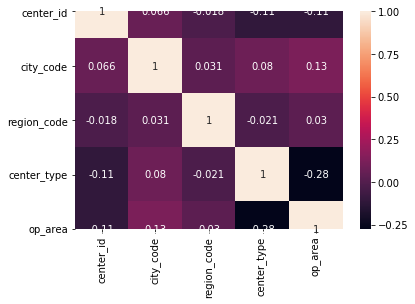

In [30]:
sb.heatmap(data.corr(),annot=True)

In [ ]:
## Handling missing values and checking for null values

In [31]:
data.isna()

,center_id,city_code,region_code,center_type,op_area
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
72,False,False,False,False,False
73,False,False,False,False,False
74,False,False,False,False,False
75,False,False,False,False,False


In [32]:
data.isnull().sum()

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64

In [33]:
data.isnull().any()

center_id      False
city_code      False
region_code    False
center_type    False
op_area        False
dtype: bool

In [34]:
data.duplicated().any()

False

In [ ]:
## dropping columns

In [35]:
data.dropna()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,0,3.7
1,13,590,56,1,6.7
2,124,590,56,2,4.0
3,66,648,34,0,4.1
4,94,632,34,2,3.6
...,...,...,...,...,...
72,53,590,56,0,3.8
73,30,604,56,0,3.5
74,76,614,85,0,3.0
75,68,676,34,1,4.1


In [ ]:
## Find the outliers and replace the outliers

In [36]:
quantile = data.quantile(q = [0.70,0.30])
quantile

,center_id,city_code,region_code,center_type,op_area
0.7,104.4,647.0,72.2,1.0,4.24
0.3,54.6,573.2,51.8,0.0,3.68


In [37]:
IQR = quantile.iloc[0] - quantile.iloc[1]
IQR

center_id      49.80
city_code      73.80
region_code    20.40
center_type     1.00
op_area         0.56
dtype: float64

In [38]:
upper_extreme = quantile.iloc[0] + (1.5 * IQR)
upper_extreme

center_id      179.10
city_code      757.70
region_code    102.80
center_type      2.50
op_area          5.08
dtype: float64

In [39]:
lower = quantile.loc[0.30] - 1.5*IQR
lower

center_id      -20.10
city_code      462.50
region_code     21.20
center_type     -1.50
op_area          2.84
dtype: float64

In [40]:
data["center_type"] = np.where(data["center_type"]>50,40,data["center_type"])
data["region_code"] = np.where(data["region_code"]>65,31,data["region_code"])

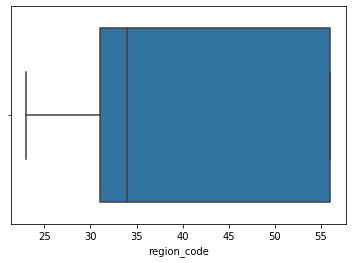

In [41]:
sb.boxplot(data["region_code"])

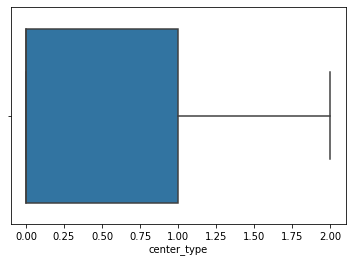

In [42]:
sb.boxplot(data["center_type"])

In [43]:
data_main =pd.get_dummies(data,columns=["center_type"])
data_main

,center_id,city_code,region_code,op_area,center_type_0,center_type_1,center_type_2
0,11,679,56,3.7,1,0,0
1,13,590,56,6.7,0,1,0
2,124,590,56,4.0,0,0,1
3,66,648,34,4.1,1,0,0
4,94,632,34,3.6,0,0,1
...,...,...,...,...,...,...,...
72,53,590,56,3.8,1,0,0
73,30,604,56,3.5,1,0,0
74,76,614,31,3.0,1,0,0
75,68,676,34,4.1,0,1,0


In [ ]:
## Checking for categorical columns and perform Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["city_code"] = le.fit_transform(data["city_code"])
data["region_code"] = le.fit_transform(data["region_code"])
data["op_area"] = le.fit_transform(data["op_area"])

In [12]:
data.head()

,center_id,city_code,region_code,center_type,op_area
0,11,39,3,TYPE_A,12
1,13,17,3,TYPE_B,28
2,124,17,3,TYPE_C,15
3,66,31,1,TYPE_A,16
4,94,28,1,TYPE_C,11


In [13]:
data.center_type.unique()

array(['TYPE_A', 'TYPE_B', 'TYPE_C'], dtype=object)

In [14]:
a = data.iloc[:,1:].values
b = data.iloc[:,4].values

In [18]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
c = ohe.fit_transform(a[:,1:]).toarray()
c

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [19]:
b

array([12, 28, 15, 16, 11, 18, 14,  5, 16, 13,  5, 15, 13,  3, 15,  6, 19,
        4,  7, 19, 13,  9, 20, 23, 15, 14, 24,  2,  9, 19,  0, 15, 15, 15,
       15, 15, 24,  5, 19, 22, 25,  5,  4,  9, 29, 29, 17, 13, 22, 13, 14,
       22,  2, 21, 14,  1, 27, 13, 26, 14,  5, 17, 18, 14, 11, 11, 18, 18,
       16,  8, 14, 14, 13, 10,  7, 16, 29], dtype=int32)

In [20]:
## split the data into dependent and independent variables

In [25]:
l=data.iloc[:,1:3].values

In [26]:
from sklearn.preprocessing import scale

In [27]:
h=scale(l)
h

array([[ 1.19967137, -0.06102782],
       [-0.39674913, -0.06102782],
       [-0.39674913, -0.06102782],
       [ 0.61915482, -1.23581335],
       [ 0.40146112, -1.23581335],
       [-0.90470111,  1.11375771],
       [-0.32418456,  1.11375771],
       [ 1.48992964, -1.23581335],
       [-1.04983025, -1.23581335],
       [-0.68700741,  1.11375771],
       [ 1.70762335,  1.70115048],
       [ 1.70762335,  1.70115048],
       [-1.04983025, -1.23581335],
       [-1.41265309,  1.11375771],
       [-0.61444284, -1.23581335],
       [-1.04983025, -1.23581335],
       [ 1.99788162,  1.70115048],
       [ 0.83684853, -0.06102782],
       [-1.26752395,  1.11375771],
       [ 0.54659025, -0.06102782],
       [ 1.1271068 , -1.23581335],
       [ 1.63505878, -1.82320612],
       [ 0.32889655,  1.11375771],
       [-1.04983025, -1.23581335],
       [ 1.27223594,  1.11375771],
       [ 0.25633198,  1.11375771],
       [-0.03392629, -0.06102782],
       [ 0.54659025, -0.06102782],
       [ 0.69171939,

In [28]:
# Split the data into training and testing data

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(h,l,test_size=0.2,random_state=42)

In [32]:
print(X_train.shape,X_test.shape)

(61, 2) (16, 2)
